### Glove Embedding

In [ ]:
# https://medium.com/swlh/playing-with-word-vectors-308ab2faa519
# https://github.com/makcedward/nlp/blob/master/sample/nlp-word_embedding.ipynb

In [1]:
%matplotlib inline

In [6]:
gloveFile = "./pretrained/glove.6B.50d.txt"
import numpy as np
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    with open(gloveFile, encoding="utf8" ) as f:
        content = f.readlines()
    model = {}
    for line in content:
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model

import re
from nltk.corpus import stopwords
import pandas as pd

def preprocess(raw_text):

    # keep only words
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split 
    words = letters_only_text.lower().split()

    # remove stopwords
    stopword_set = set(stopwords.words("english"))
    cleaned_words = list(set([w for w in words if w not in stopword_set]))

    return cleaned_words

def cosine_distance_between_two_words(word1, word2):
    import scipy
    return (1- scipy.spatial.distance.cosine(model[word1], model[word2]))

def calculate_heat_matrix_for_two_sentences(s1,s2):
    s1 = preprocess(s1)
    s2 = preprocess(s2)
    result_list = [[cosine_distance_between_two_words(word1, word2) for word2 in s2] for word1 in s1]
    result_df = pd.DataFrame(result_list)
    result_df.columns = s2
    result_df.index = s1
    return result_df

def cosine_distance_wordembedding_method(s1, s2):
    import scipy
    vector_1 = np.mean([model[word] for word in preprocess(s1)],axis=0)
    vector_2 = np.mean([model[word] for word in preprocess(s2)],axis=0)
    cosine = scipy.spatial.distance.cosine(vector_1, vector_2)
    print('Word Embedding method with a cosine distance asses that our two sentences are similar to',round((1-cosine)*100,2),'%')

def heat_map_matrix_between_two_sentences(s1,s2):
    df = calculate_heat_matrix_for_two_sentences(s1,s2)
    import seaborn as sns
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(5,5)) 
    ax_blue = sns.heatmap(df, cmap="YlGnBu")
    # ax_red = sns.heatmap(df)
    print(cosine_distance_wordembedding_method(s1, s2))
    return ax_blue

In [7]:
model = loadGloveModel(gloveFile)

Loading Glove Model
Done. 400000  words loaded!


Word Embedding method with a cosine distance asses that our two sentences are similar to 49.99 %
None


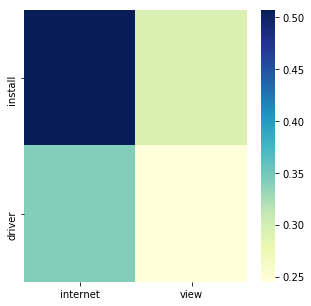

In [9]:
ss1 = 'can not install driver'
ss2 = 'can not view from internet'
heat_map_matrix_between_two_sentences(ss1,ss2)

Word Embedding method with a cosine distance asses that our two sentences are similar to 88.7 %
None


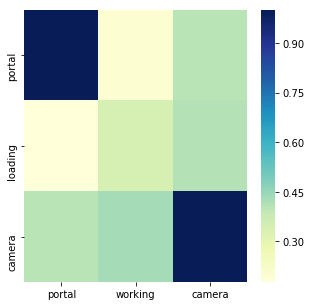

In [11]:
ss1 = 'portal camera not loading'
ss2 = 'portal camera not working'
heat_map_matrix_between_two_sentences(ss1,ss2)

Word Embedding method with a cosine distance asses that our two sentences are similar to 78.25 %
None


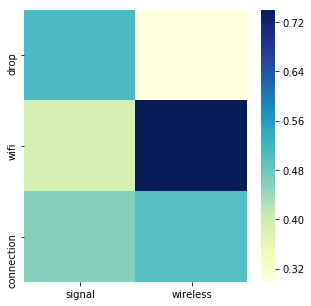

In [13]:
ss1 = 'wifi connection drop'
ss2 = 'wireless no signal'
heat_map_matrix_between_two_sentences(ss1,ss2)